In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying plots inline
%matplotlib inline


In [15]:
# Load the Excel file
file_path = 'AviationAccidentStatistics_2004-2023_20241217.xlsx'
xls = pd.ExcelFile(file_path)

# Check available sheet names
xls.sheet_names


['Table 29']

In [16]:
# Load the main sheet
df_raw = xls.parse('Table 29')
df_raw.head(15)  # View the first 15 rows to check header structure


,"Table 29. Accident Aircraft, 2004 through 2023, US Civil Aviation",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NTSB Number,Event Date,City,State or Region,Country,Fatal Injuries,Serious Injuries,Highest Injury Level,Aircraft Number,Damage Level,Registration Number,Aircraft Category,Aircraft Make,Aircraft Model,Flight Regulation,Flight Schedule Type,Purpose of Flight
2,FTW04FA052,2004-01-01 00:00:00,Dallas,Texas,United States,2,0,Fatal,1,Destroyed,N4104B,Airplane,Bellanca,17-30A,Part 91: General aviation,NaN,Personal
3,SEA04FA031,2004-01-01 00:00:00,Cave Junction,Oregon,United States,1,3,Fatal,1,Substantial,N53505,Airplane,Piper,PA-44-180,Part 91: General aviation,NaN,Personal
4,FTW04LA053,2004-01-01 00:00:00,Sheridan,Arkansas,United States,0,0,Minor,1,Substantial,N5284C,Airplane,Mooney,M20R,Part 91: General aviation,NaN,Personal
5,SEA04FA032,2004-01-01 00:00:00,Glasgow,Montana,United States,4,0,Fatal,1,Destroyed,N3171S,Airplane,Cessna,182G,Part 91: General aviation,NaN,Unknown
6,LAX04LA084,2004-01-01 00:00:00,Riverside,California,United States,0,0,NaN,1,Substantial,N589Q,Airplane,Piper,PA-32R-300,Part 91: General aviation,NaN,Personal
7,FTW04FA054,2004-01-02 00:00:00,Beaumont,Texas,United States,2,0,Fatal,1,Destroyed,N396HP,Airplane,Piper,PA-32R-301,Part 91: General aviation,NaN,Instructional
8,NYC04WA055,2004-01-02 00:00:00,Toussus Le Nobl,NaN,France,3,0,Fatal,1,Destroyed,N480CA,Airplane,Piper,PA-31T,Part 91: General aviation,NaN,Personal
9,CHI04LA052,2004-01-02 00:00:00,Fishers,Indiana,United States,0,0,NaN,1,Substantial,N21992,Airplane,Piper,PA-32RT-300,Part 91: General aviation,NaN,Personal


In [17]:
# Set proper column names using second row
df = df_raw[2:].copy()
df.columns = df_raw.iloc[1]

# Drop rows with all NaN values
df.dropna(how='all', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the cleaned data
df.head()


1,NTSB Number,Event Date,City,State or Region,Country,Fatal Injuries,Serious Injuries,Highest Injury Level,Aircraft Number,Damage Level,Registration Number,Aircraft Category,Aircraft Make,Aircraft Model,Flight Regulation,Flight Schedule Type,Purpose of Flight
0,FTW04FA052,2004-01-01 00:00:00,Dallas,Texas,United States,2,0,Fatal,1,Destroyed,N4104B,Airplane,Bellanca,17-30A,Part 91: General aviation,NaN,Personal
1,SEA04FA031,2004-01-01 00:00:00,Cave Junction,Oregon,United States,1,3,Fatal,1,Substantial,N53505,Airplane,Piper,PA-44-180,Part 91: General aviation,NaN,Personal
2,FTW04LA053,2004-01-01 00:00:00,Sheridan,Arkansas,United States,0,0,Minor,1,Substantial,N5284C,Airplane,Mooney,M20R,Part 91: General aviation,NaN,Personal
3,SEA04FA032,2004-01-01 00:00:00,Glasgow,Montana,United States,4,0,Fatal,1,Destroyed,N3171S,Airplane,Cessna,182G,Part 91: General aviation,NaN,Unknown
4,LAX04LA084,2004-01-01 00:00:00,Riverside,California,United States,0,0,NaN,1,Substantial,N589Q,Airplane,Piper,PA-32R-300,Part 91: General aviation,NaN,Personal


In [ ]:
# Objective 1: Yearly Trends in Aviation Accidents

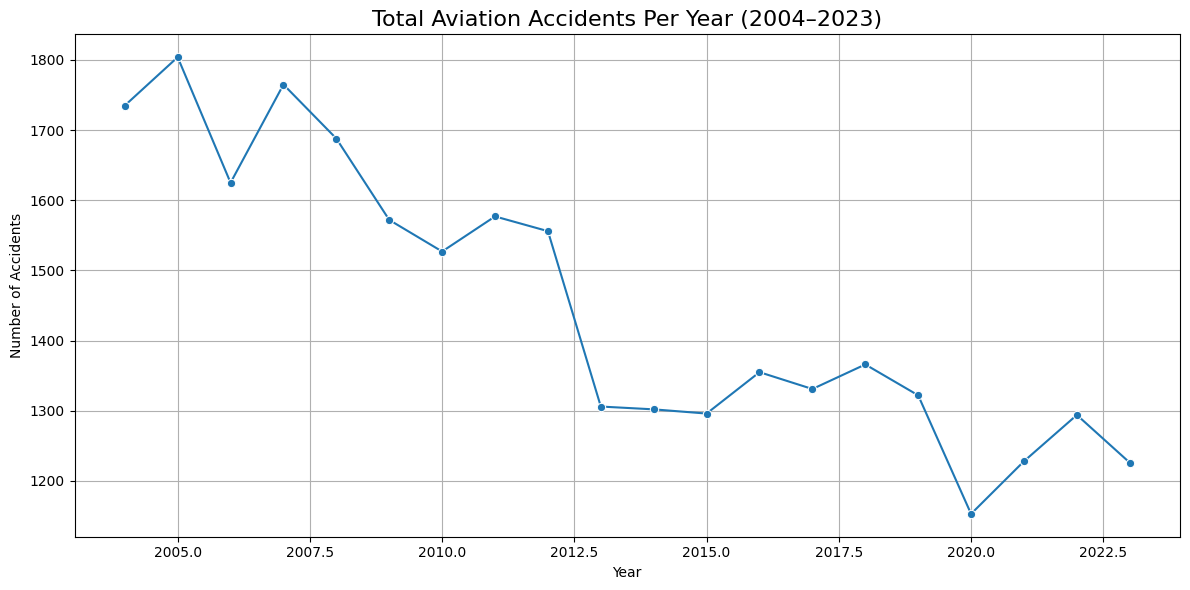

In [ ]:
# Extract year from Event Date
df['Year'] = df['Event Date'].dt.year

# Count number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')
plt.title('Total Aviation Accidents Per Year (2004–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)plt.tight_layout()
plt.show()


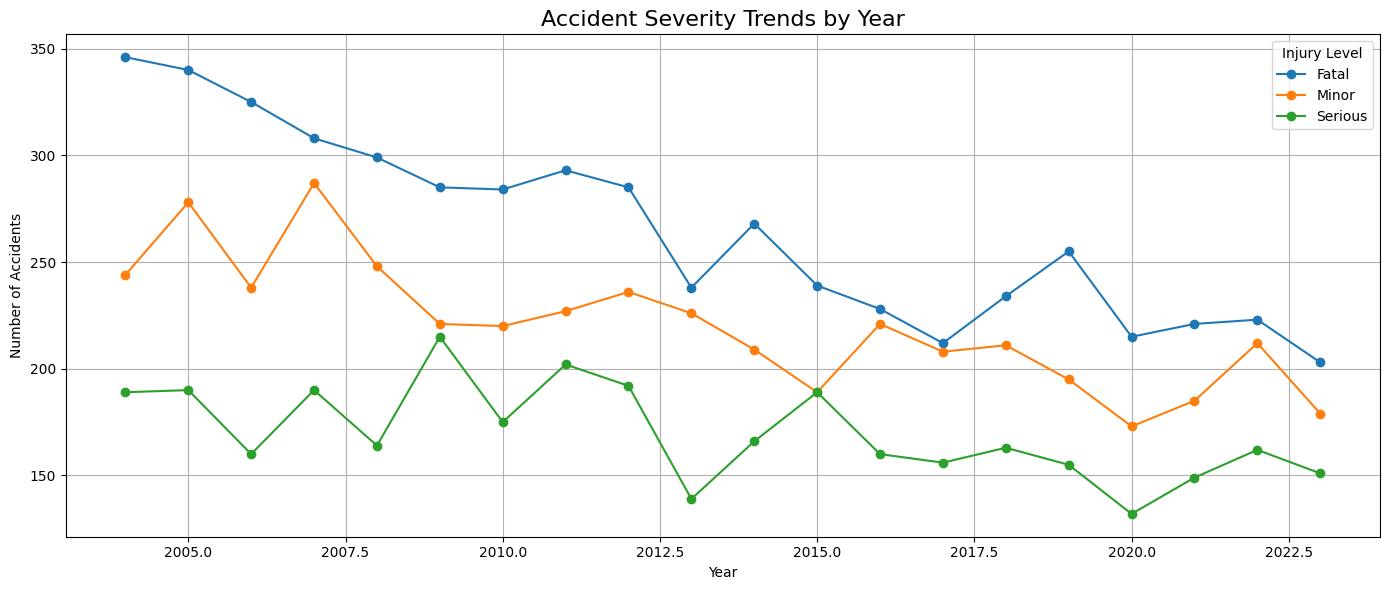

In [20]:
# Group by Year and Highest Injury Level
severity_trend = df.groupby(['Year', 'Highest Injury Level']).size().unstack().fillna(0)

# Plot
severity_trend.plot(kind='line', figsize=(14,6), marker='o')
plt.title('Accident Severity Trends by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.legend(title='Injury Level')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19716\2713027233.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='Blues')


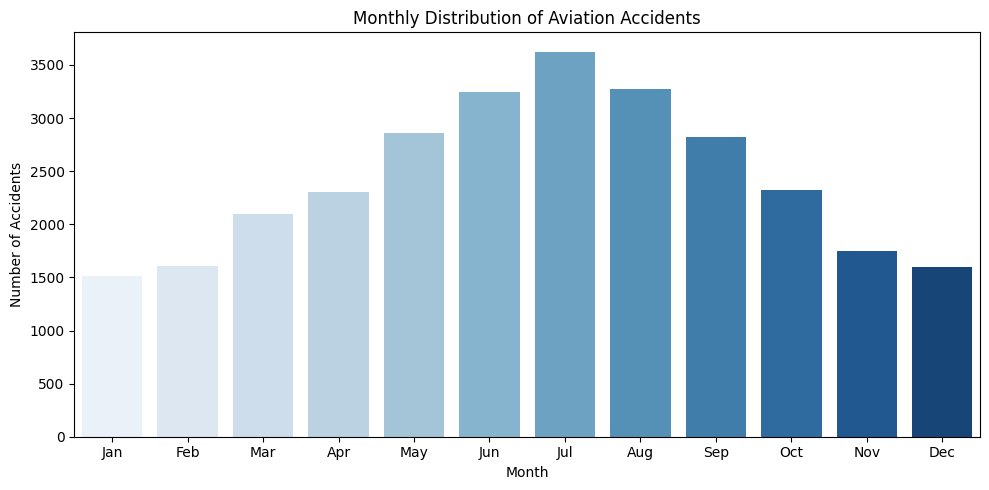

In [21]:
# Create a Month column
df['Month'] = df['Event Date'].dt.month

# Aggregate accidents by month
monthly_trend = df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='Blues')
plt.title('Monthly Distribution of Aviation Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


# Objective 2: Geospatial Risk Profiling by State or Region

C:\Users\hp\AppData\Local\Temp\ipykernel_19716\1591454336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='Reds_r')


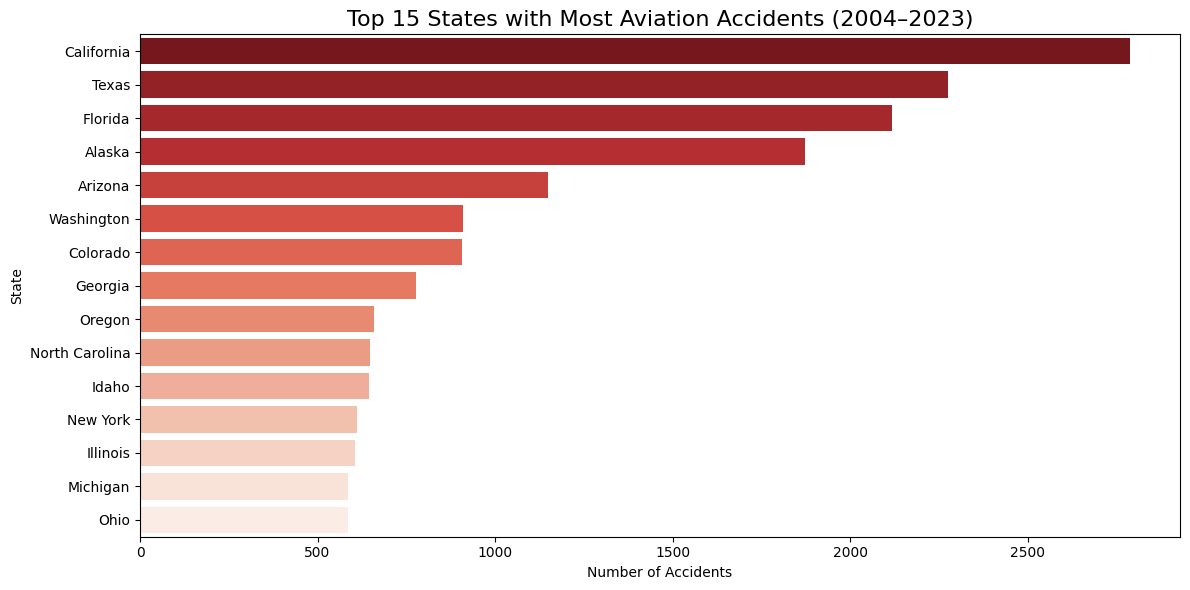

In [22]:
# Group by State or Region
state_counts = df['State or Region'].value_counts().head(15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='Reds_r')
plt.title('Top 15 States with Most Aviation Accidents (2004–2023)', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.tight_layout()
plt.show()


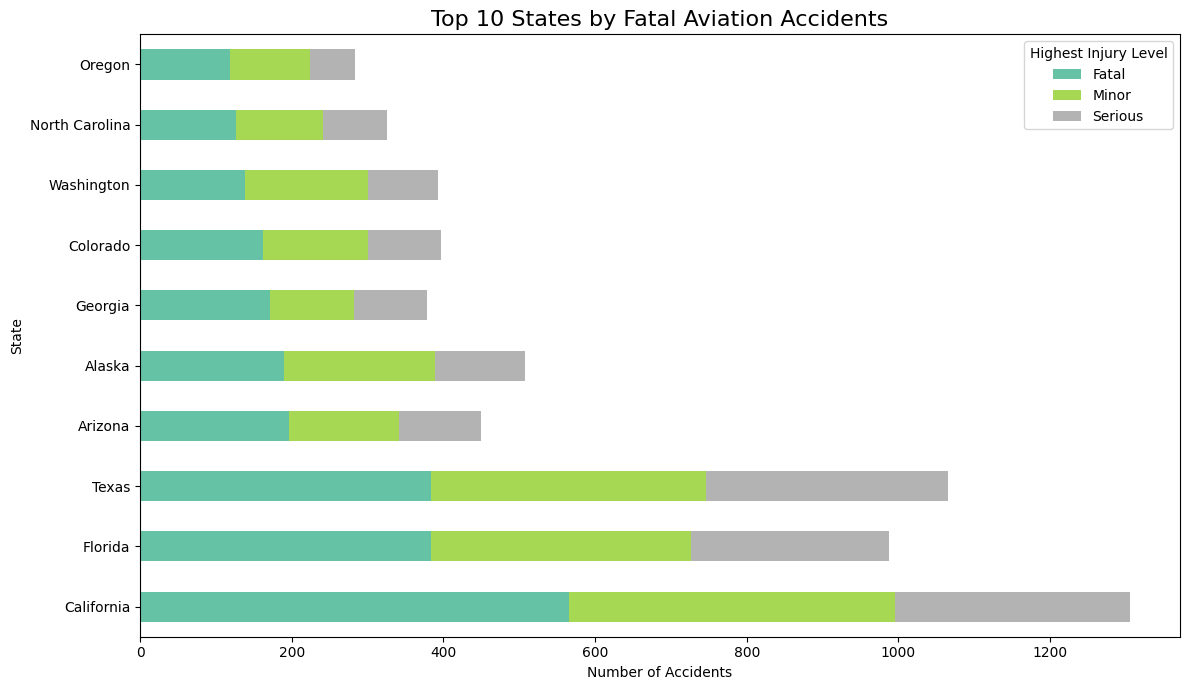

In [23]:
# Group by State and Injury Level
state_severity = df.groupby(['State or Region', 'Highest Injury Level']).size().unstack().fillna(0)

# Show top 10 states by fatal accidents
top_fatal_states = state_severity.sort_values(by='Fatal', ascending=False).head(10)

# Plot
top_fatal_states.plot(kind='barh', stacked=True, figsize=(12,7), colormap='Set2')
plt.title('Top 10 States by Fatal Aviation Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.tight_layout()
plt.show()


# Objective 3: Aircraft Type vs Accident Severity

C:\Users\hp\AppData\Local\Temp\ipykernel_19716\3486373196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_makes.index, x=top_makes.values, palette='Purples_r')


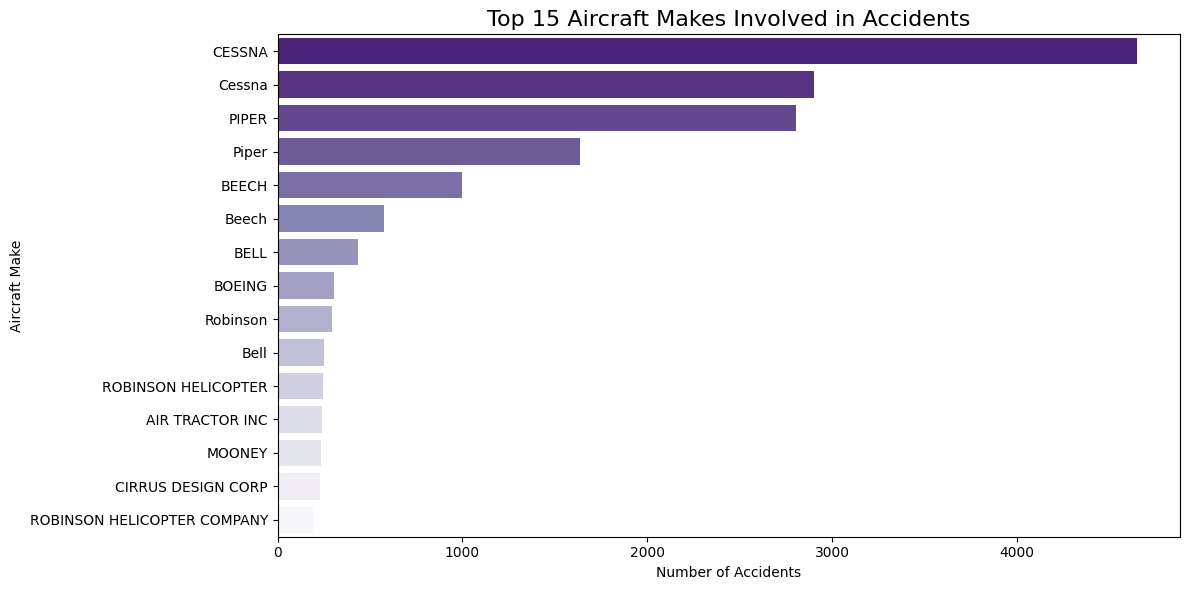

In [24]:
# Top 15 aircraft makes
top_makes = df['Aircraft Make'].value_counts().head(15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(y=top_makes.index, x=top_makes.values, palette='Purples_r')
plt.title('Top 15 Aircraft Makes Involved in Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.tight_layout()
plt.show()


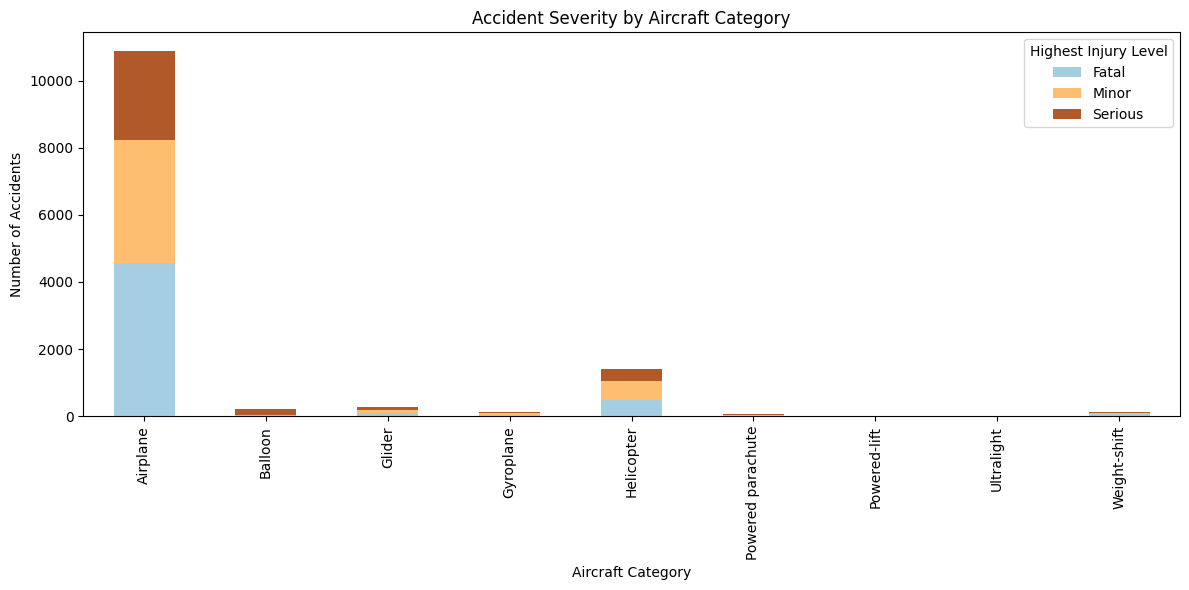

In [25]:
# Group by Category and Severity
category_severity = df.groupby(['Aircraft Category', 'Highest Injury Level']).size().unstack().fillna(0)

# Plot
category_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title('Accident Severity by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


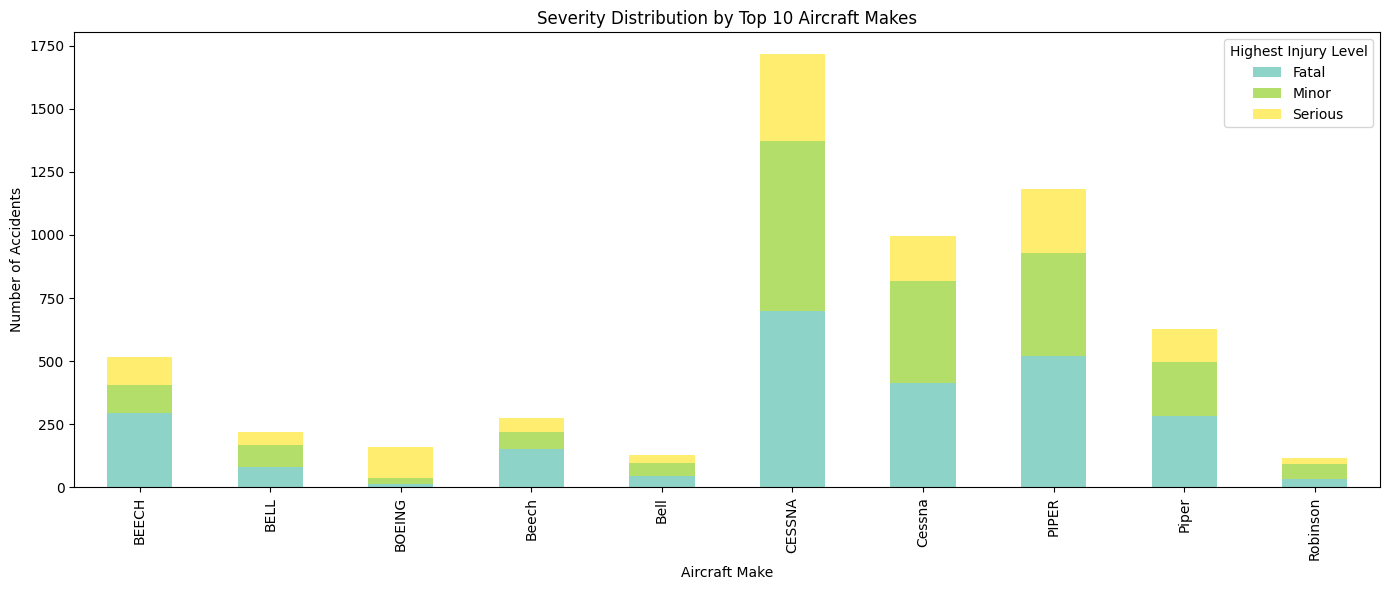

In [26]:
# Filter to top 10 aircraft makes
top_make_names = df['Aircraft Make'].value_counts().head(10).index
df_top_makes = df[df['Aircraft Make'].isin(top_make_names)]

# Group by make and severity
make_severity = df_top_makes.groupby(['Aircraft Make', 'Highest Injury Level']).size().unstack().fillna(0)

# Plot
make_severity.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set3')
plt.title('Severity Distribution by Top 10 Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


# Objective 4: Flight Regulation Type vs Accident Severity

C:\Users\hp\AppData\Local\Temp\ipykernel_19716\3781078608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=regulation_counts.index, x=regulation_counts.values, palette='coolwarm')


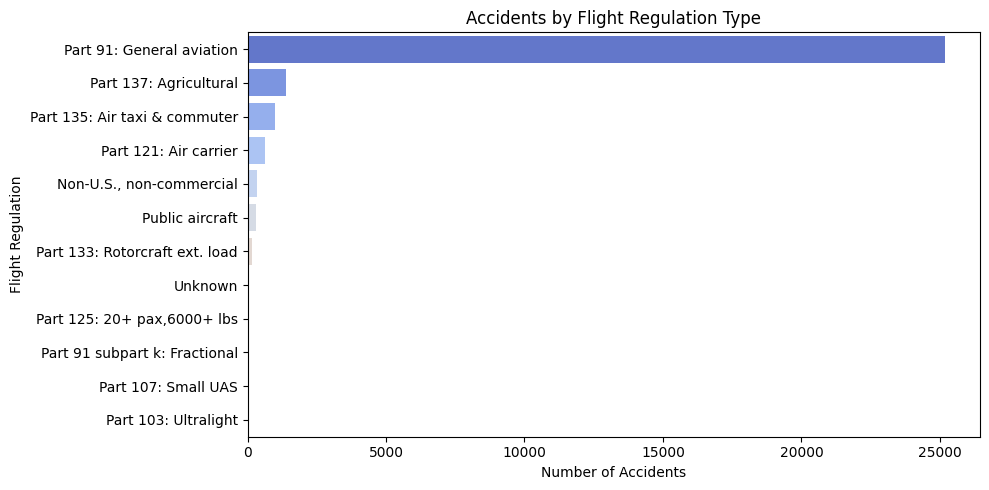

In [27]:
# Top flight regulation types
regulation_counts = df['Flight Regulation'].value_counts()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=regulation_counts.index, x=regulation_counts.values, palette='coolwarm')
plt.title('Accidents by Flight Regulation Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Regulation')
plt.tight_layout()
plt.show()


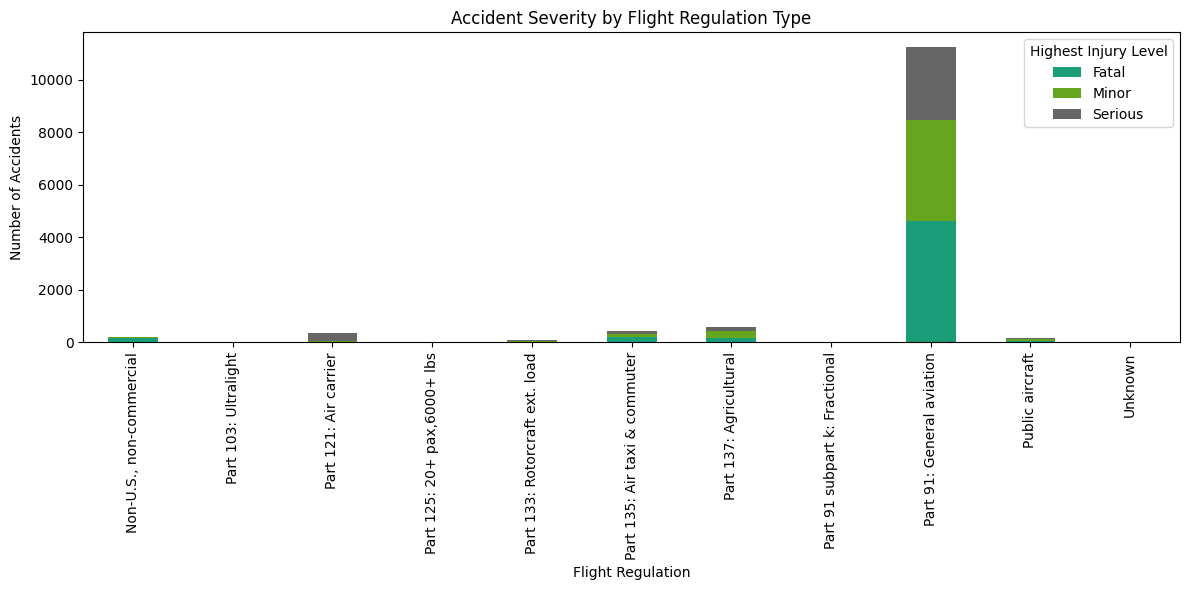

In [28]:
# Group by Regulation and Injury Level
regulation_severity = df.groupby(['Flight Regulation', 'Highest Injury Level']).size().unstack().fillna(0)

# Plot
regulation_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Dark2')
plt.title('Accident Severity by Flight Regulation Type')
plt.xlabel('Flight Regulation')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


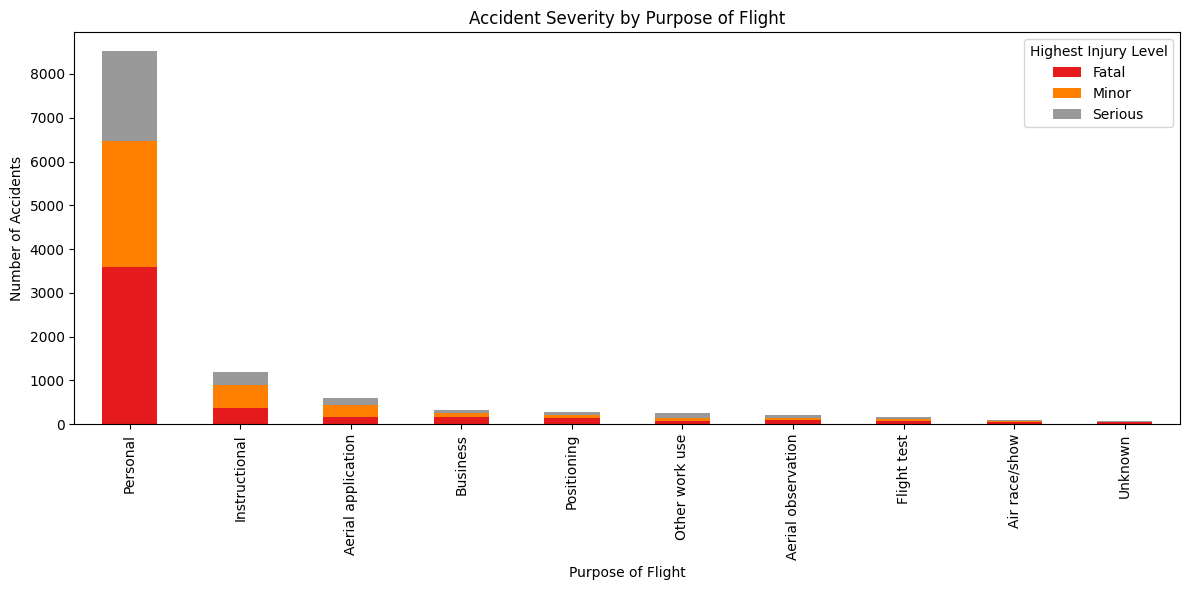

In [29]:
# Group by Purpose of Flight and Severity
purpose_severity = df.groupby(['Purpose of Flight', 'Highest Injury Level']).size().unstack().fillna(0)

# Top 10 purposes
top_purposes = purpose_severity.sum(axis=1).sort_values(ascending=False).head(10)
purpose_severity = purpose_severity.loc[top_purposes.index]

# Plot
purpose_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set1')
plt.title('Accident Severity by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


# Objective 5: Determine Key Factors Associated with Fatal Injuries

In [30]:
# Create binary target column: 1 if fatal, else 0
df['Is_Fatal'] = df['Highest Injury Level'].apply(lambda x: 1 if str(x).strip().lower() == 'fatal' else 0)

# Check distribution
df['Is_Fatal'].value_counts()


Is_Fatal
0    23727
1     5301
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_19716\4215077097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_by_category.values, y=fatal_by_category.index, palette='Reds')


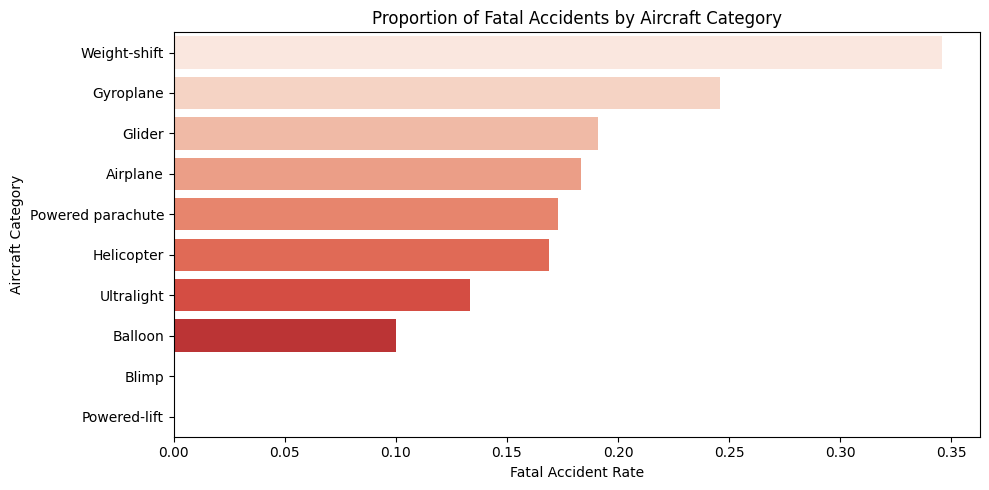

In [31]:
fatal_by_category = df.groupby('Aircraft Category')['Is_Fatal'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=fatal_by_category.values, y=fatal_by_category.index, palette='Reds')
plt.title('Proportion of Fatal Accidents by Aircraft Category')
plt.xlabel('Fatal Accident Rate')
plt.ylabel('Aircraft Category')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19716\2606902496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_by_regulation.values, y=fatal_by_regulation.index, palette='Oranges')


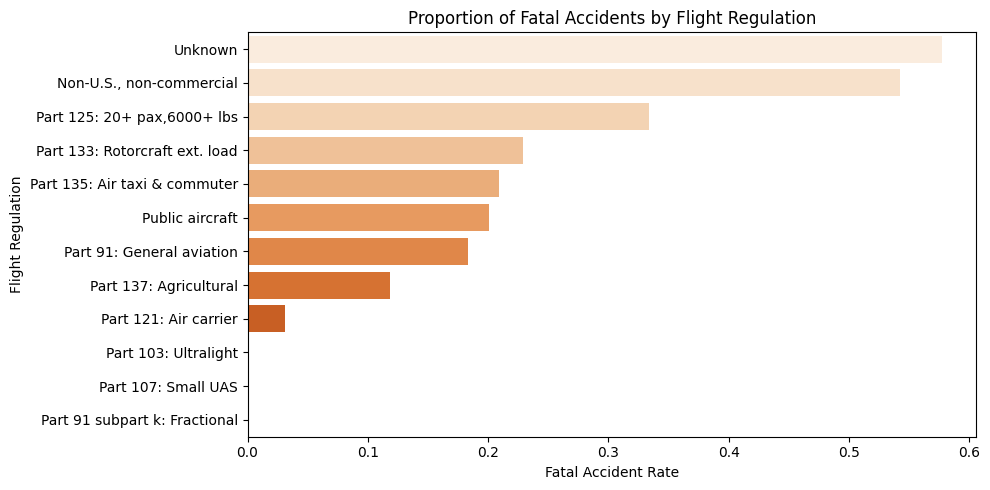

In [32]:
fatal_by_regulation = df.groupby('Flight Regulation')['Is_Fatal'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=fatal_by_regulation.values, y=fatal_by_regulation.index, palette='Oranges')
plt.title('Proportion of Fatal Accidents by Flight Regulation')
plt.xlabel('Fatal Accident Rate')
plt.ylabel('Flight Regulation')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19716\3682602509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_by_purpose.values, y=fatal_by_purpose.index, palette='Purples')


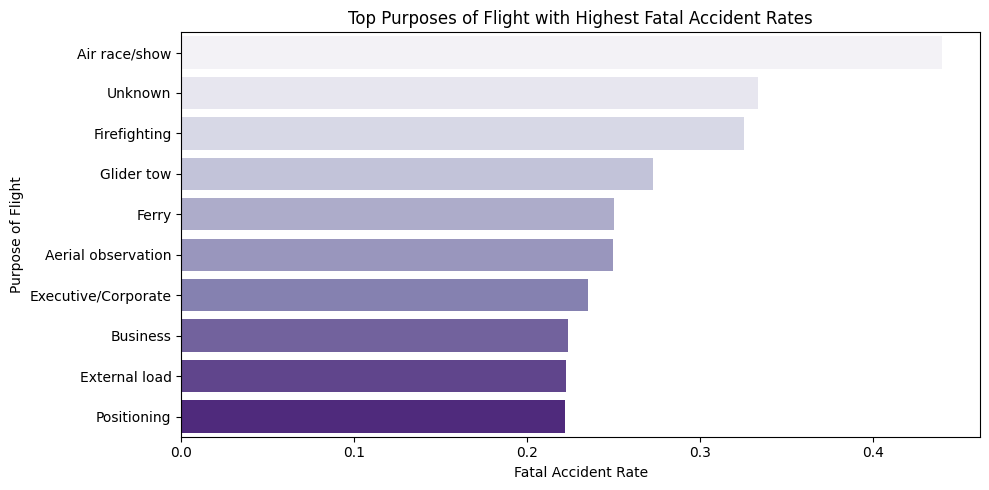

In [33]:
fatal_by_purpose = df.groupby('Purpose of Flight')['Is_Fatal'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=fatal_by_purpose.values, y=fatal_by_purpose.index, palette='Purples')
plt.title('Top Purposes of Flight with Highest Fatal Accident Rates')
plt.xlabel('Fatal Accident Rate')
plt.ylabel('Purpose of Flight')
plt.tight_layout()
plt.show()
